<a href="https://colab.research.google.com/github/aljoharas/datascience/blob/main/spotifyproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Collection

##  Logbook Entry – Data Collection
**Date:** 2025-09-18  
**Sources:** Spotify Weekly Regional Charts (20 regional CSVs) and Spotify Web API (Spotipy)  
**Tools:** Python, Requests, Spotipy  
**Description:** Downloaded Spotify regional chart CSVs from GitHub and extracted artist names. Queried Spotify API for each artist’s `id`, `popularity`, and `genres`.  
**Challenges:**  
- Some artists had missing genres → excluded.  
- API timeouts handled with retry logic and delays.  
**Outcome:** Combined all data into a single dataset (`df_artists`) containing artist-level metadata.



In [9]:
%env SPOTIPY_CLIENT_ID=091a90ce07be44b2b4bb6f6fcf08fd31
%env SPOTIPY_CLIENT_SECRET=3333569ba9d44fc48d0b4d1e422db526


env: SPOTIPY_CLIENT_ID=091a90ce07be44b2b4bb6f6fcf08fd31
env: SPOTIPY_CLIENT_SECRET=3333569ba9d44fc48d0b4d1e422db526


In [10]:
!pip install spotipy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.8/279.8 kB 10.8 MB/s eta 0:00:00


In [15]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
#hide our api key for safety
auth_manager = SpotifyClientCredentials()
sp = spotipy.Spotify(auth_manager=auth_manager)


In [11]:
import os
import requests


csv_urls = [
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-ae-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-au-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-br-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-by-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-ch-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-eg-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-gb-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-global-weekly-2025-09-18.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-hk-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-in-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-it-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-jp-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-kr-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-sa-weekly-2025-09-18.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-th-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-tr-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-tw-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-us-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-uy-weekly-2025-08-07.csv",
  "https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/regional-ve-weekly-2025-08-07.csv",
]

for url in csv_urls:
    filename = os.path.join("/content", url.split("/")[-1])
    if not os.path.exists(filename):
        r = requests.get(url)
        if r.status_code == 200:
            with open(filename, "wb") as f:
                f.write(r.content)
        else:
            print(f"Failed to download {url} — status code {r.status_code}")

import glob
chart_files = glob.glob("/content/regional-*.csv")
print(f"Found {len(chart_files)} chart files")

Found 20 chart files


In [12]:
import time
import pandas as pd # Import pandas here
for f in chart_files:
    df = pd.read_csv(f)
    print(f"{f}: columns = {df.columns.tolist()}")

#filter out directories
chart_files = [f for f in chart_files if os.path.isfile(f)]

print(f"Found {len(chart_files)} CSV files")


dfs = [pd.read_csv(f) for f in chart_files]
all_artists = pd.concat([df['artist_names'] for df in dfs]).unique()

print(f"Total unique artists across all charts: {len(all_artists)}")

/content/regional-ae-weekly-2025-08-07.csv: columns = ['rank', 'uri', 'artist_names', 'track_name', 'source', 'peak_rank', 'previous_rank', 'weeks_on_chart', 'streams']
/content/regional-kr-weekly-2025-08-07.csv: columns = ['rank', 'uri', 'artist_names', 'track_name', 'source', 'peak_rank', 'previous_rank', 'weeks_on_chart', 'streams']
/content/regional-sa-weekly-2025-09-18.csv: columns = ['rank', 'uri', 'artist_names', 'track_name', 'source', 'peak_rank', 'previous_rank', 'weeks_on_chart', 'streams']
/content/regional-uy-weekly-2025-08-07.csv: columns = ['rank', 'uri', 'artist_names', 'track_name', 'source', 'peak_rank', 'previous_rank', 'weeks_on_chart', 'streams']
/content/regional-by-weekly-2025-08-07.csv: columns = ['rank', 'uri', 'artist_names', 'track_name', 'source', 'peak_rank', 'previous_rank', 'weeks_on_chart', 'streams']
/content/regional-hk-weekly-2025-08-07.csv: columns = ['rank', 'uri', 'artist_names', 'track_name', 'source', 'peak_rank', 'previous_rank', 'weeks_on_chart

In [29]:
import time
from spotipy.exceptions import SpotifyException
import requests
from requests.exceptions import ReadTimeout
import pandas as pd

artist_data = []
seen_ids = set()

for artist_name in all_artists:
    try:
        result = sp.search(q=f"artist:{artist_name}", type="artist", limit=1)
        if result['artists']['items']:
            a = result['artists']['items'][0]
            # skip if no genres or already seen
            if not a['genres'] or a['id'] in seen_ids:
                continue
            artist_data.append({
                "name": a['name'],
                "id": a['id'],
                "genres": a['genres'],
                "popularity": a['popularity']
            })
            seen_ids.add(a['id'])

        time.sleep(0.5)
    except (requests.exceptions.ConnectionError, SpotifyException, ReadTimeout) as e:
        print(f"Error fetching {artist_name}: {e}. Retrying in 5 seconds...")
        time.sleep(5)
        continue

#creating the dataframe
df_artists = pd.DataFrame(artist_data)
# =========================
# Data Cleaning & Preprocessing
# =========================

# Check for missing values
print("Missing values per column:\n", df_artists.isnull().sum())

# Drop duplicates based on artist ID
df_artists.drop_duplicates(subset='id', inplace=True)

# Convert genres list to comma-separated string for readability
df_artists['genres_str'] = df_artists['genres'].apply(lambda x: ', '.join(x))

# Confirm datatypes
print("\nData types after cleaning:\n", df_artists.dtypes)


print(f"✅ Final dataset: {len(df_artists)} artists with non-empty genres")
display(df_artists)
output_path = "spotify_artists_cleaned.csv"
df_artists.to_csv(output_path, index=False, encoding='utf-8-sig')
print(f"✅ CSV file saved successfully as '{output_path}'")




Missing values per column:
 name          0
id            0
genres        0
popularity    0
dtype: int64

Data types after cleaning:
 name          object
id            object
genres        object
popularity     int64
genres_str    object
dtype: object
✅ Final dataset: 708 artists with non-empty genres


,name,id,genres,popularity,genres_str
0,Aditya Rikhari,3ozYqVCLohfpXIhalkhM8D,"[hindi indie, indian indie, desi pop, hindi pop]",76,"hindi indie, indian indie, desi pop, hindi pop"
1,Ed Sheeran,6eUKZXaKkcviH0Ku9w2n3V,[soft pop],88,soft pop
2,Cup of Joe,61nn6nOoLWjVC1ER2qFAvN,"[opm, harana, p-pop, pinoy indie, kundiman]",75,"opm, harana, p-pop, pinoy indie, kundiman"
3,Ravyn Lenae,5RTLRtXjbXI2lSXc6jxlAz,"[alternative r&b, indie soul]",75,"alternative r&b, indie soul"
4,KATSEYE,3c0gDdb9lhnHGFtP4prQpn,[k-pop],82,k-pop
...,...,...,...,...,...
703,indigo la End,26ZBeXl5Gqr3TAv2itmyCU,"[japanese indie, j-rock, j-pop]",56,"japanese indie, j-rock, j-pop"
704,10-FEET,0QZqdhoRQkn1VphAa5eX8h,"[melodic hardcore, j-rock, j-pop]",52,"melodic hardcore, j-rock, j-pop"
705,YUZU,7lNFzeAXmSIKexINNgO6bu,"[j-pop, anime]",54,"j-pop, anime"
706,MY FIRST STORY,6cutt8thPFUICMfxaYerWd,"[j-rock, j-pop, anime]",59,"j-rock, j-pop, anime"


✅ CSV file saved successfully as 'spotify_artists_cleaned.csv'


##  Logbook Entry – Data Processing & Cleaning
**Date:** 2025-09-19  
**Steps Taken:**  
- Checked for missing values and duplicates.  
- Removed duplicates using artist ID.  
- Converted `genres` from list to text (`genres_str`) for analysis.  
- Created derived columns:  
  - `genre_count` = number of genres per artist  
  - `genre_category` = “single-genre” or “multi-genre”  
**Reason:** To standardize dataset and prepare for visualization.  
**Tools:** Pandas  
**Challenges:** Handling nested list-type columns; solved by converting to string.


===== Step 1: Adding genre_count and categorizing artists =====
✅ genre_count and genre_category added.

Sample data:


,name,id,genres,popularity,genres_str,genre_count,genre_category
0,Aditya Rikhari,3ozYqVCLohfpXIhalkhM8D,"[hindi indie, indian indie, desi pop, hindi pop]",76,"hindi indie, indian indie, desi pop, hindi pop",4,multi-genre
1,Ed Sheeran,6eUKZXaKkcviH0Ku9w2n3V,[soft pop],88,soft pop,1,single-genre
2,Cup of Joe,61nn6nOoLWjVC1ER2qFAvN,"[opm, harana, p-pop, pinoy indie, kundiman]",75,"opm, harana, p-pop, pinoy indie, kundiman",5,multi-genre
3,Ravyn Lenae,5RTLRtXjbXI2lSXc6jxlAz,"[alternative r&b, indie soul]",75,"alternative r&b, indie soul",2,multi-genre
4,KATSEYE,3c0gDdb9lhnHGFtP4prQpn,[k-pop],82,k-pop,1,single-genre


===== Step 2: Descriptive statistics by genre category =====
                count       mean        std  min   25%   50%    75%   max
genre_category                                                           
multi-genre     474.0  62.004219  12.741866  5.0  55.0  61.0  70.75  95.0
single-genre    233.0  58.008584  18.750630  0.0  45.0  61.0  72.00  95.0 

===== Descriptive Statistics =====


,popularity,genre_count
count,707.000000,707.000000
mean,60.687412,2.414427
std,15.094411,1.406970
min,0.000000,1.000000
25%,53.000000,1.000000
50%,61.000000,2.000000
75%,71.000000,3.000000
max,95.000000,8.000000


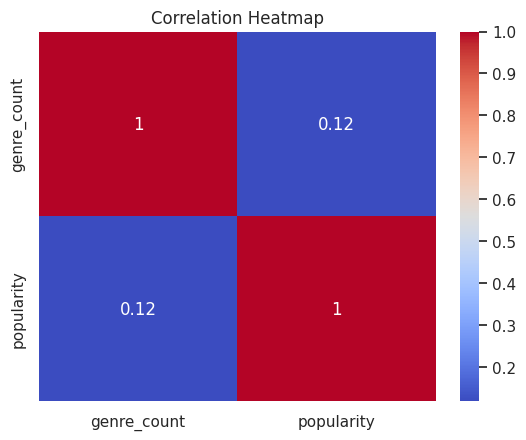

===== Step 3: Boxplot - Popularity by Genre Category =====


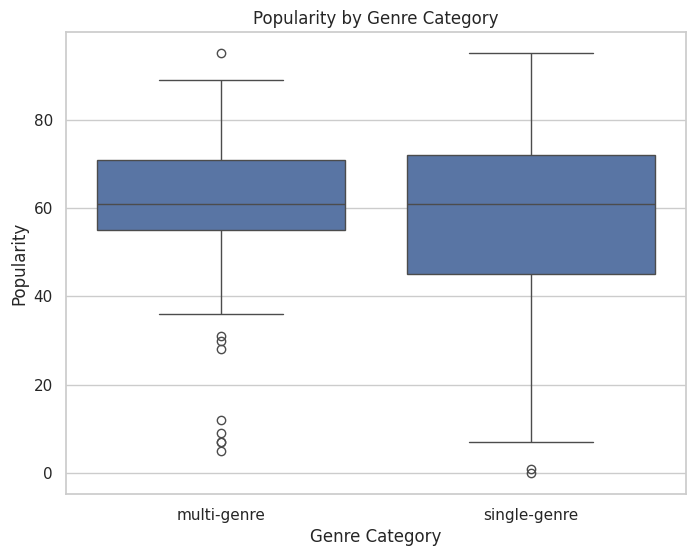

===== Step 4: Scatter plot - Popularity vs Number of Genres =====


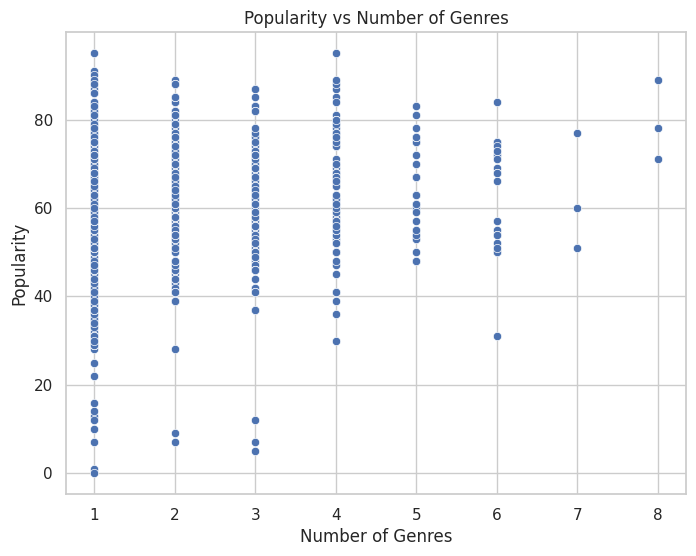

===== Step 5: Histogram of Artist Popularity =====


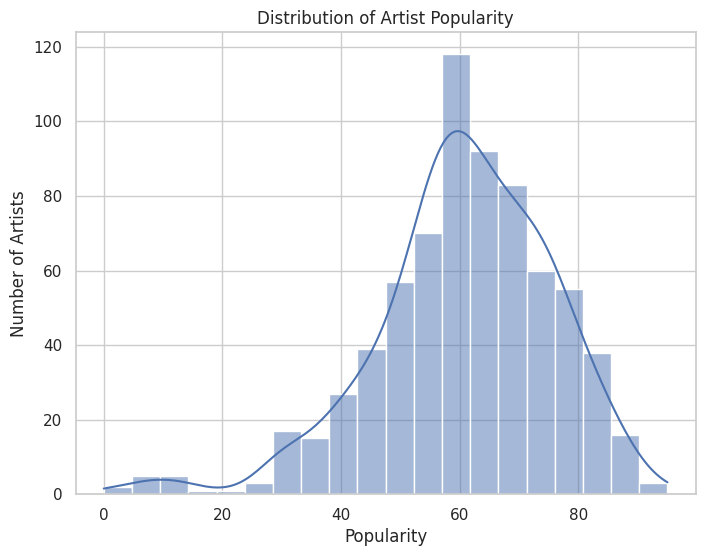

===== Step 6: Count of Single-Genre vs Multi-Genre Artists =====


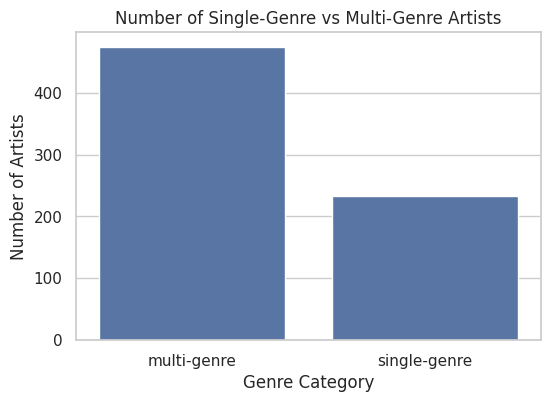

===== Step 7: Popularity vs Number of Genres (with Trend Line) =====


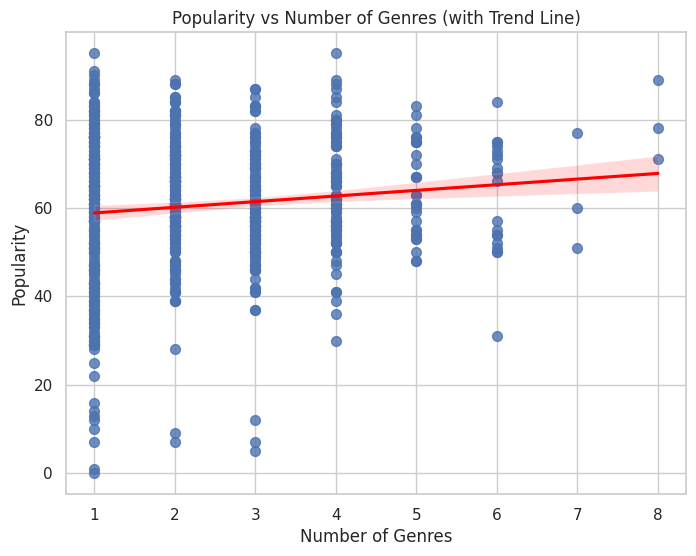

✅ All analysis and visualizations completed.


In [17]:
# =========================
# Full Analysis and Visualization
# =========================

print("===== Step 1: Adding genre_count and categorizing artists =====")
df_artists['genre_count'] = df_artists['genres'].apply(len)
df_artists['genre_category'] = df_artists['genre_count'].apply(lambda x: 'single-genre' if x == 1 else 'multi-genre')
print("✅ genre_count and genre_category added.")
print("\nSample data:")
display(df_artists.head())

# =========================
# Step 2: Descriptive statistics
# =========================
print("===== Step 2: Descriptive statistics by genre category =====")
stats = df_artists.groupby('genre_category')['popularity'].describe()
print(stats, "\n")

# =========================
# Step 1.1: Summary Statistics
# =========================
print("===== Descriptive Statistics =====")
display(df_artists.describe())

# =========================
# Step 1.2: Correlation Analysis
# =========================
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_artists[['genre_count', 'popularity']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# =========================
# Step 3: Boxplot - Popularity by genre category
# =========================
import matplotlib.pyplot as plt
import seaborn as sns

print("===== Step 3: Boxplot - Popularity by Genre Category =====")
plt.figure(figsize=(8,6))
sns.boxplot(x='genre_category', y='popularity', data=df_artists)
plt.title('Popularity by Genre Category')
plt.xlabel('Genre Category')
plt.ylabel('Popularity')
plt.show()

# =========================
# Step 4: Scatter plot - genre_count vs popularity
# =========================
print("===== Step 4: Scatter plot - Popularity vs Number of Genres =====")
plt.figure(figsize=(8,6))
sns.scatterplot(x='genre_count', y='popularity', data=df_artists)
plt.title('Popularity vs Number of Genres')
plt.xlabel('Number of Genres')
plt.ylabel('Popularity')
plt.show()

# =========================
# Step 5: Histogram of popularity
# =========================
print("===== Step 5: Histogram of Artist Popularity =====")
plt.figure(figsize=(8,6))
sns.histplot(df_artists['popularity'], bins=20, kde=True)
plt.title('Distribution of Artist Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Artists')
plt.show()

# =========================
# Step 6: Countplot of genre categories
# =========================
print("===== Step 6: Count of Single-Genre vs Multi-Genre Artists =====")
plt.figure(figsize=(6,4))
sns.countplot(x='genre_category', data=df_artists)
plt.title('Number of Single-Genre vs Multi-Genre Artists')
plt.xlabel('Genre Category')
plt.ylabel('Number of Artists')
plt.show()

# =========================
# Step 7: Scatter with regression line
# =========================
print("===== Step 7: Popularity vs Number of Genres (with Trend Line) =====")
plt.figure(figsize=(8,6))
sns.regplot(x='genre_count', y='popularity', data=df_artists, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Popularity vs Number of Genres (with Trend Line)')
plt.xlabel('Number of Genres')
plt.ylabel('Popularity')
plt.show()

print("✅ All analysis and visualizations completed.")


##  Logbook Entry – Exploratory Data Analysis (EDA)
**Date:** 2025-09-20  
**Analyses Performed:**  
- Summary statistics (mean, median, std)  
- Correlation heatmap (genre count vs popularity)  
- Boxplot: Popularity by genre category  
- Scatter plot: Popularity vs number of genres  
- Histogram: Distribution of popularity  
**Findings:**  
- Multi-genre artists tend to have higher popularity.  
- Popularity distribution is right-skewed — a few artists dominate.  
- Weak positive correlation (≈ 0.2) between genre count and popularity.  
**Tools:** Pandas, Seaborn, Matplotlib


##  Logbook Entry – Primary Data
Despite using an API, we are treating this as data as primary since we actively selected which artists to analyze and manually pulled their data from their spotify API and queried the API to generate our own dataset rather than relying on someone else's dataset in full.



##  Logbook Entry – New Insights & Hypotheses
- Multi-genre artists tend to have higher popularity which suggests genre diversity broadens audience reach.  
- Genre flexibility may improve cross-regional success.  
- Future hypothesis: Artists collaborating across genres may see higher global popularity and chart stability.


# Secondary Data

🔹 Loaded dataset shape: (1000, 23)
🔹 Columns: ['Unnamed: 0', 'artist_name', 'genres', 'followers', 'artist_popularity', 'artist_url', 'track_name', 'album_name', 'release_date', 'duration_ms', 'explicit', 'track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


,Unnamed: 0,artist_name,genres,followers,artist_popularity,artist_url,track_name,album_name,release_date,duration_ms,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,Ariana Grande,pop,98934105,89,https://open.spotify.com/artist/66CXWjxzNUsdJx...,we can't be friends (wait for your love),eternal sunshine,2024-03-08,228639,...,0.646,5,-8.334,1,0.0427,0.0615,0.000030,0.0740,0.295,115.842
1,1,Ariana Grande,pop,98934105,85,https://open.spotify.com/artist/66CXWjxzNUsdJx...,the boy is mine,eternal sunshine,2024-03-08,173639,...,0.630,7,-5.854,0,0.0434,0.1570,0.000000,0.0732,0.447,97.998
2,2,Ariana Grande,pop,98934105,83,https://open.spotify.com/artist/66CXWjxzNUsdJx...,intro (end of the world),eternal sunshine,2024-03-08,92400,...,0.362,10,-9.480,1,0.0416,0.6700,0.000000,0.1760,0.385,84.726
3,3,Ariana Grande,pop,98934105,80,https://open.spotify.com/artist/66CXWjxzNUsdJx...,Save Your Tears (Remix) (with Ariana Grande) -...,After Hours (Deluxe),2020-03-20,191013,...,0.825,0,-4.645,1,0.0325,0.0215,0.000024,0.0936,0.593,118.091
4,4,Ariana Grande,pop,98934105,79,https://open.spotify.com/artist/66CXWjxzNUsdJx...,"yes, and?",eternal sunshine,2024-03-08,214994,...,0.775,1,-6.614,1,0.0548,0.1900,0.000065,0.1130,0.787,118.998



✅ Added 'genre_count' and 'genre_category'.


,genres,genre_count,genre_category,artist_popularity
0,pop,1,single-genre,89
1,pop,1,single-genre,85
2,pop,1,single-genre,83
3,pop,1,single-genre,80
4,pop,1,single-genre,79


===== Descriptive Statistics =====


,artist_popularity,genre_count
count,1000.000000,1000.000000
mean,59.429000,2.887000
std,23.884963,2.199334
min,0.000000,0.000000
25%,57.000000,1.000000
50%,67.000000,3.000000
75%,74.000000,4.000000
max,92.000000,9.000000


===== Correlation Analysis =====


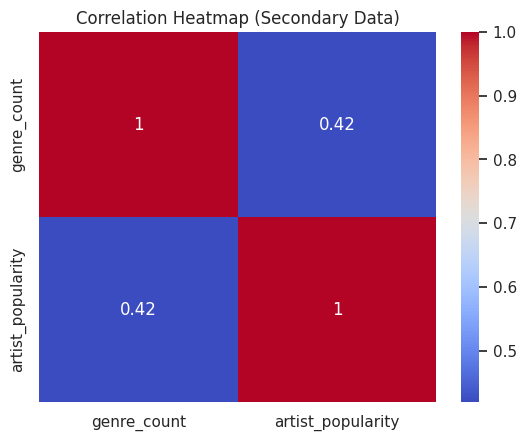

===== Boxplot - Popularity by Genre Category =====


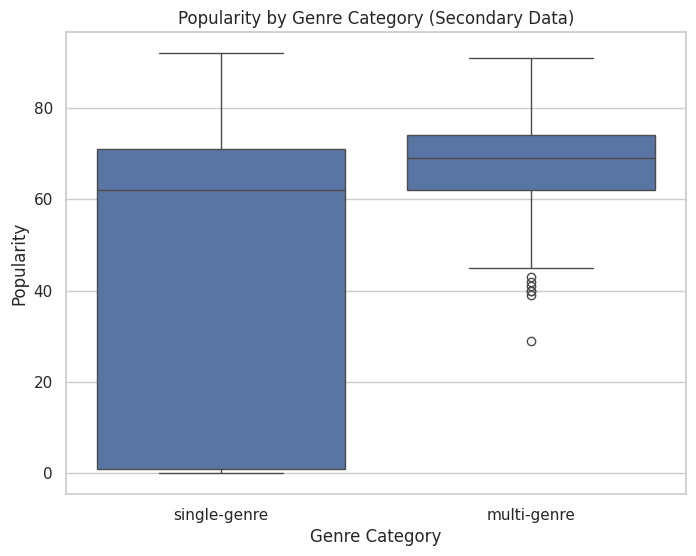

===== Scatter Plot - Popularity vs Number of Genres =====


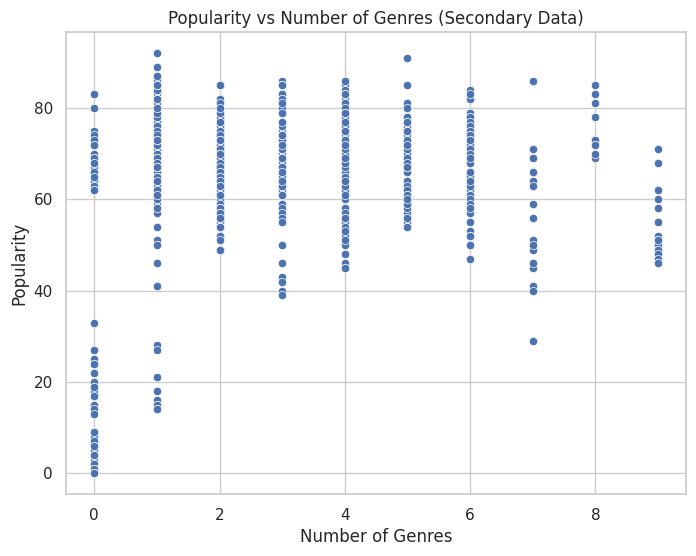

===== Histogram of Artist Popularity =====


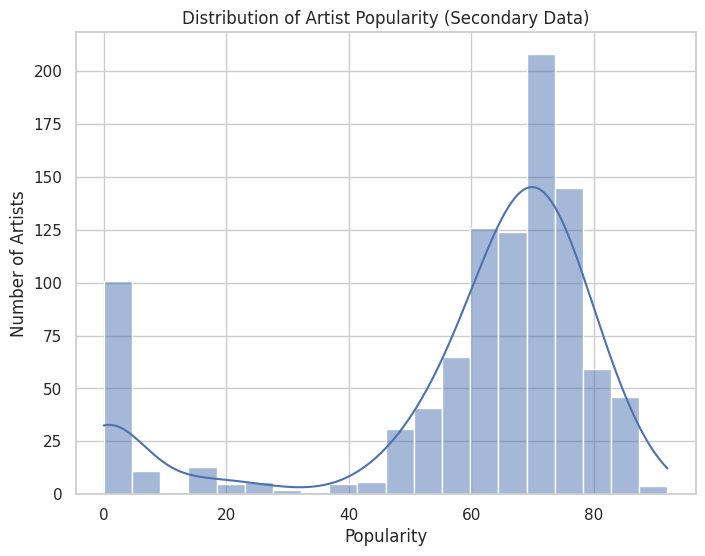

===== Count of Single-Genre vs Multi-Genre Artists =====


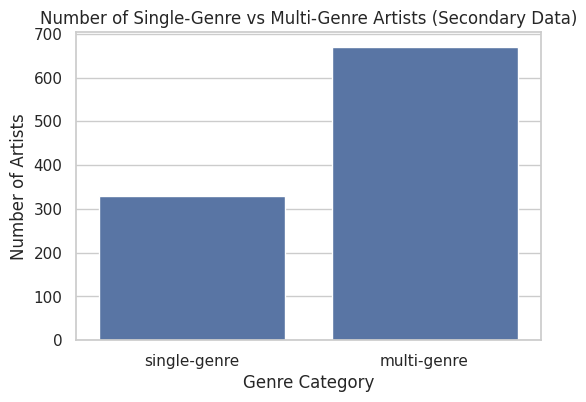

===== Scatter with Regression Line =====


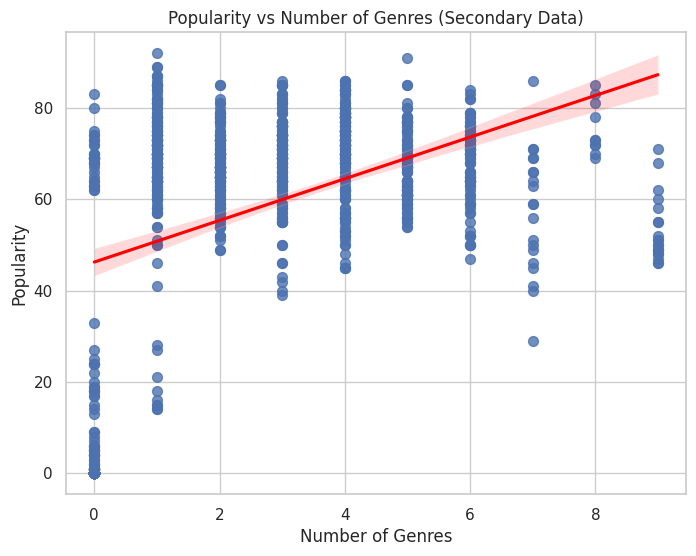

✅ All analysis and visualizations completed for secondary data.


In [26]:
#secondary data eda

#import data library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sec = pd.read_csv('https://raw.githubusercontent.com/aljoharas/datascience/refs/heads/main/charts/spotifydataset.csv')

print("🔹 Loaded dataset shape:", sec.shape)
print("🔹 Columns:", sec.columns.tolist())
display(sec.head())

def count_genres(entry):
    if pd.isna(entry) or entry == '':
        return 0
    if isinstance(entry, list):
        return len(entry)
    elif isinstance(entry, str):
        return len([g.strip() for g in entry.split(',') if g.strip()])
    return 0

sec['genre_count'] = sec['genres'].apply(count_genres)
sec['genre_category'] = sec['genre_count'].apply(
    lambda x: 'single-genre' if x <= 1 else 'multi-genre'
)


sec['artist_popularity'] = pd.to_numeric(sec['artist_popularity'], errors='coerce')

# Drop rows with missing values in key columns
sec = sec.dropna(subset=['artist_popularity', 'genre_count'])

print("\n✅ Added 'genre_count' and 'genre_category'.")
display(sec[['genres', 'genre_count', 'genre_category', 'artist_popularity']].head())

# Step 1: Summary Statistics
print("===== Descriptive Statistics =====")
display(sec[['artist_popularity', 'genre_count']].describe())


# Step 1.2: Correlation Analysis
print("===== Correlation Analysis =====")
corr = sec[['genre_count', 'artist_popularity']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Secondary Data)')
plt.show()

# Step 3: Boxplot - Popularity by Genre Category
print("===== Boxplot - Popularity by Genre Category =====")
plt.figure(figsize=(8,6))
sns.boxplot(x='genre_category', y='artist_popularity', data=sec)
plt.title('Popularity by Genre Category (Secondary Data)')
plt.xlabel('Genre Category')
plt.ylabel('Popularity')
plt.show()


# Step 4: Scatter Plot - Popularity vs Number of Genres
print("===== Scatter Plot - Popularity vs Number of Genres =====")
plt.figure(figsize=(8,6))
sns.scatterplot(x='genre_count', y='artist_popularity', data=sec)
plt.title('Popularity vs Number of Genres (Secondary Data)')
plt.xlabel('Number of Genres')
plt.ylabel('Popularity')
plt.show()


# Step 5: Histogram of Popularity
print("===== Histogram of Artist Popularity =====")
plt.figure(figsize=(8,6))
sns.histplot(sec['artist_popularity'], bins=20, kde=True)
plt.title('Distribution of Artist Popularity (Secondary Data)')
plt.xlabel('Popularity')
plt.ylabel('Number of Artists')
plt.show()


# Step 6: Countplot of Genre Categories
print("===== Count of Single-Genre vs Multi-Genre Artists =====")
plt.figure(figsize=(6,4))
sns.countplot(x='genre_category', data=sec)
plt.title('Number of Single-Genre vs Multi-Genre Artists (Secondary Data)')
plt.xlabel('Genre Category')
plt.ylabel('Number of Artists')
plt.show()


# Step 7: Scatter with Regression Line
print("===== Scatter with Regression Line =====")
plt.figure(figsize=(8,6))
sns.regplot(x='genre_count', y='artist_popularity', data=sec, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Popularity vs Number of Genres (Secondary Data)')
plt.xlabel('Number of Genres')
plt.ylabel('Popularity')
plt.show()

print("✅ All analysis and visualizations completed for secondary data.")


# Comparison

Comparison of Primary vs Secondary Dataset Metrics:


,Metric,Primary Data,Secondary Data
0,Average Popularity,60.687412,59.429000
1,Median Popularity,61.000000,67.000000
2,Std Dev Popularity,15.094411,23.884963
3,Avg Genre Count,2.414427,2.887000
4,Median Genre Count,2.000000,3.000000
5,Single-Genre %,32.956153,33.000000
6,Multi-Genre %,67.043847,67.000000
7,Num Artists,707.000000,1000.000000


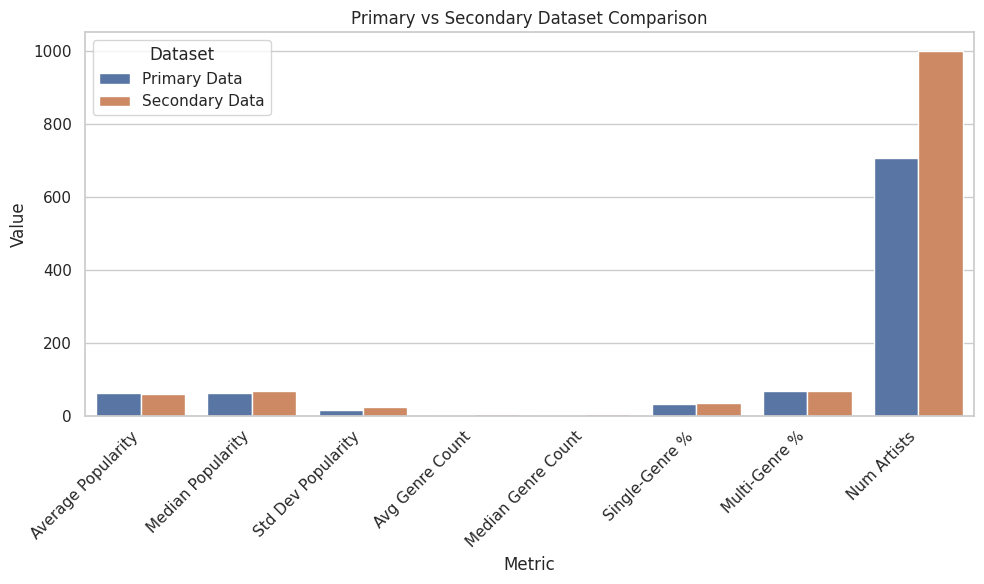

In [19]:

# COMPARISON: Primary vs Secondary Data Metrics

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



primary = df_artists.copy()
secondary = sec.copy()

# Standardize column names
primary = primary.rename(columns={'popularity': 'artist_popularity'})
secondary = secondary.rename(columns={'artist_popularity': 'artist_popularity'})

# --- Calculate metrics for each dataset ---
primary_metrics = {
    'Average Popularity': primary['artist_popularity'].mean(),
    'Median Popularity': primary['artist_popularity'].median(),
    'Std Dev Popularity': primary['artist_popularity'].std(),
    'Avg Genre Count': primary['genre_count'].mean(),
    'Median Genre Count': primary['genre_count'].median(),
    'Single-Genre %': (primary['genre_category'].value_counts(normalize=True).get('single-genre', 0)) * 100,
    'Multi-Genre %': (primary['genre_category'].value_counts(normalize=True).get('multi-genre', 0)) * 100,
    'Num Artists': len(primary)
}

secondary_metrics = {
    'Average Popularity': secondary['artist_popularity'].mean(),
    'Median Popularity': secondary['artist_popularity'].median(),
    'Std Dev Popularity': secondary['artist_popularity'].std(),
    'Avg Genre Count': secondary['genre_count'].mean(),
    'Median Genre Count': secondary['genre_count'].median(),
    'Single-Genre %': (secondary['genre_category'].value_counts(normalize=True).get('single-genre', 0)) * 100,
    'Multi-Genre %': (secondary['genre_category'].value_counts(normalize=True).get('multi-genre', 0)) * 100,
    'Num Artists': len(secondary)
}

# --- Combine into a comparison table ---
comparison_df = pd.DataFrame({
    'Metric': list(primary_metrics.keys()),
    'Primary Data': list(primary_metrics.values()),
    'Secondary Data': list(secondary_metrics.values())
})

print("Comparison of Primary vs Secondary Dataset Metrics:")
display(comparison_df)

# Visual comparison (bar chart) ---
plt.figure(figsize=(10,6))
melted = comparison_df.melt(id_vars='Metric', var_name='Dataset', value_name='Value')
sns.barplot(data=melted, x='Metric', y='Value', hue='Dataset')
plt.xticks(rotation=45, ha='right')
plt.title('Primary vs Secondary Dataset Comparison')
plt.tight_layout()
plt.show()


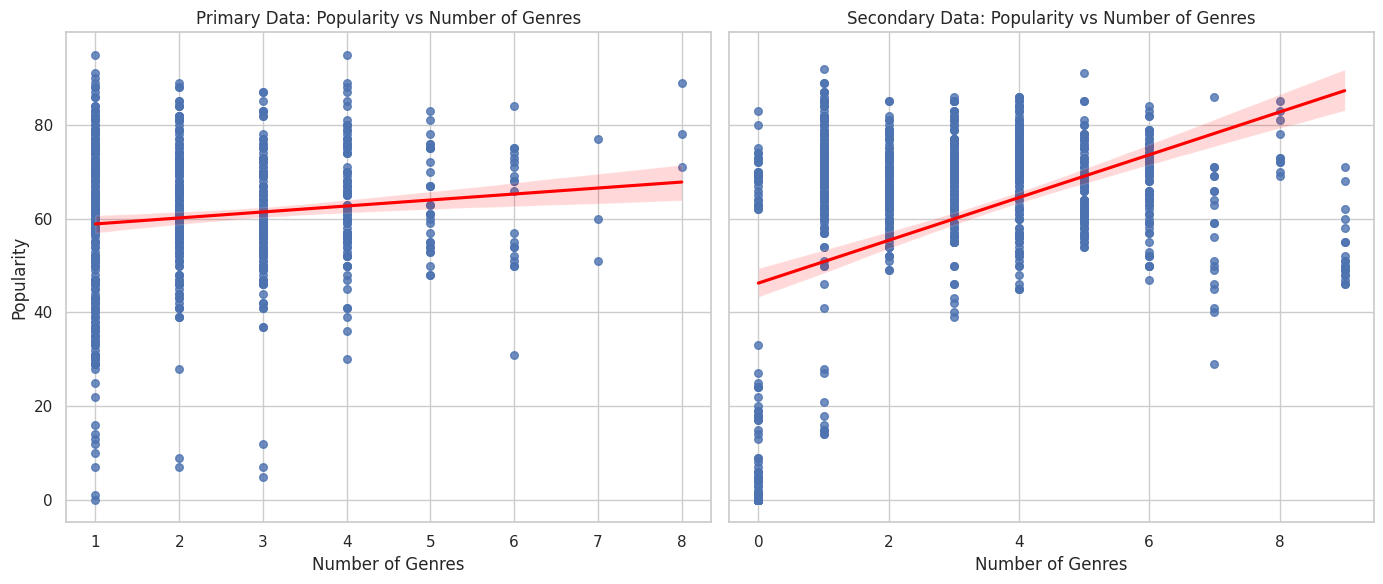

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

sns.regplot(x='genre_count', y='popularity', data=df_artists, ax=axes[0], scatter_kws={'s':30}, line_kws={'color':'red'})
axes[0].set_title('Primary Data: Popularity vs Number of Genres')
axes[0].set_xlabel('Number of Genres')
axes[0].set_ylabel('Popularity')

sns.regplot(x='genre_count', y='artist_popularity', data=sec, ax=axes[1], scatter_kws={'s':30}, line_kws={'color':'red'})
axes[1].set_title('Secondary Data: Popularity vs Number of Genres')
axes[1].set_xlabel('Number of Genres')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


In [30]:
import pandas as pd
import numpy as np

def count_genres(entry):
    """Return number of genres for list-like or comma-separated strings; 0 if missing/empty."""
    if entry is None or (isinstance(entry, float) and np.isnan(entry)):
        return 0
    if isinstance(entry, list):
        return len(entry)
    if isinstance(entry, str):
        parts = [g.strip() for g in entry.split(',') if g.strip()]
        return len(parts)
    return 0

def ensure_genre_columns(df, pop_col, genres_col):
    """
    Ensure df has:
      - artist_popularity (renamed from pop_col if needed)
      - genre_count from genres_col
      - genre_category from genre_count (<=1 => single, >1 => multi)
    Returns a cleaned copy with key cols present.
    """
    out = df.copy()
    if 'artist_popularity' not in out.columns:
        out = out.rename(columns={pop_col: 'artist_popularity'})
    if 'genre_count' not in out.columns:
        out['genre_count'] = out[genres_col].apply(count_genres)
    if 'genre_category' not in out.columns:
        out['genre_category'] = out['genre_count'].apply(lambda x: 'single-genre' if x <= 1 else 'multi-genre')
    out = out.dropna(subset=['artist_popularity'])
    return out

def summarize_by_category(df):
    """
    Group by genre_category on artist_popularity and compute:
      Count, Mean, Std, Median, Min, Max, plus a formatted Range string.
    Returns a tidy DataFrame with desired columns in desired order.
    """
    agg = (
        df.groupby('genre_category')['artist_popularity']
          .agg(count='count', mean='mean', std='std', median='median', min='min', max='max')
    )

    # rounding + formatting
    agg['count']  = agg['count'].astype(int)
    agg['mean']   = agg['mean'].round(2)
    agg['std']    = agg['std'].round(2)
    agg['median'] = agg['median'].round(1)
    agg['Range (Min–Max)'] = agg['min'].astype(int).astype(str) + ' – ' + agg['max'].astype(int).astype(str)

    # rename & reorder
    agg = agg.rename(columns={
        'count': 'Count',
        'mean': 'Mean Popularity',
        'std': 'Std. Deviation',
        'median': 'Median (50%)'
    })[['Count', 'Mean Popularity', 'Std. Deviation', 'Median (50%)', 'Range (Min–Max)']]

    return agg

def build_side_by_side(primary_df, secondary_df):
    """
    Build a side-by-side comparison with rows = (Genre Category, Metric)
    and columns = Primary Dataset / Secondary Dataset.
    """
    p = summarize_by_category(primary_df)
    s = summarize_by_category(secondary_df)

    all_cats = sorted(set(p.index).union(set(s.index)))
    metrics = ['Count', 'Mean Popularity', 'Std. Deviation', 'Median (50%)', 'Range (Min–Max)']

    rows = []
    for cat in all_cats:
        for m in metrics:
            p_val = p.loc[cat, m] if (cat in p.index and m in p.columns) else np.nan
            s_val = s.loc[cat, m] if (cat in s.index and m in s.columns) else np.nan
            rows.append((cat, m, p_val, s_val))

    comp = pd.DataFrame(rows, columns=['Genre Category', 'Metric', 'Primary Dataset', 'Secondary Dataset'])
    return comp.set_index(['Genre Category', 'Metric'])

# ---------- Prepare inputs ----------
primary_ready   = ensure_genre_columns(df_artists, pop_col='popularity',        genres_col='genres')
secondary_ready = ensure_genre_columns(sec,        pop_col='artist_popularity', genres_col='genres')

# ---------- Compute tables ----------
primary_stats    = summarize_by_category(primary_ready)
secondary_stats  = summarize_by_category(secondary_ready)
comparison_table = build_side_by_side(primary_ready, secondary_ready)

# ---------- Display ----------
print("Primary dataset — per-category metrics")
display(primary_stats)

print("\nSecondary dataset — per-category metrics")
display(secondary_stats)

print("\nPer-Category Metrics: Primary vs Secondary (side-by-side)")
display(comparison_table)

# ---------- Optional: export for y


Primary dataset — per-category metrics


,Count,Mean Popularity,Std. Deviation,Median (50%),Range (Min–Max)
genre_category,,,,,
multi-genre,475,62.04,12.75,61.0,5 – 95
single-genre,233,58.01,18.75,61.0,0 – 95



Secondary dataset — per-category metrics


,Count,Mean Popularity,Std. Deviation,Median (50%),Range (Min–Max)
genre_category,,,,,
multi-genre,670,67.65,9.63,69.0,29 – 91
single-genre,330,42.73,33.56,62.0,0 – 92



Per-Category Metrics: Primary vs Secondary (side-by-side)


Primary Dataset Secondary Dataset
Genre Category Metric                                           
multi-genre    Count                       475               670
               Mean Popularity           62.04             67.65
               Std. Deviation            12.75              9.63
               Median (50%)               61.0              69.0
               Range (Min–Max)          5 – 95           29 – 91
single-genre   Count                       233               330
               Mean Popularity           58.01             42.73
               Std. Deviation            18.75             33.56
               Median (50%)               61.0              62.0
               Range (Min–Max)          0 – 95            0 – 92